In [1]:
import dataloader

dataset = dataloader.MIRDataset("beatles",use_deep_chroma=True,align_chroma=True,split_nr=8)

tracks = dataset.getTrackList()
track_id = list(tracks.keys())

## load track
y,t_chroma,chroma,ref_intervals,ref_labels = dataset[track_id[12]]

LOADING AUDIO: 
03_-_Lucy_In_The_Sky_With_Diamonds ID: 0803


Transcribing with Chord Templates
Transcribing with Chord Templates


/home/max/ET-TI/Masterarbeit/chord-recognition/transcribe.py:67: RuntimeWarning: invalid value encountered in divide
  chroma_norm = chroma / max_vals[:,None]


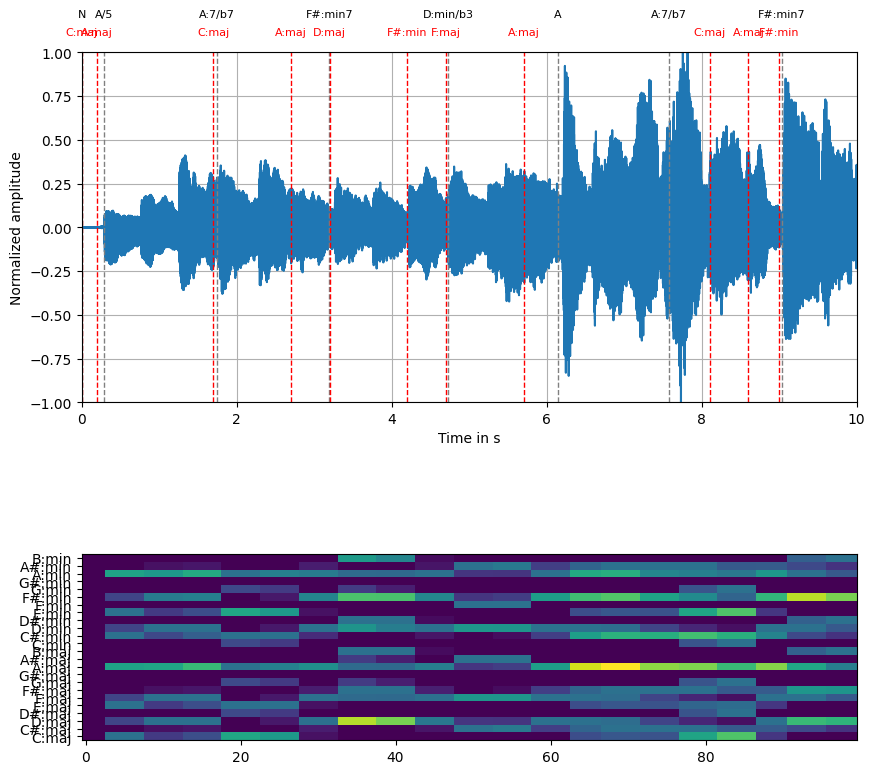

In [81]:
# create correlation matrix
from transcribe import createChordTemplates,transcribeChromagram
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import utils
print("Transcribing with Chord Templates")
labels,templates = createChordTemplates()
est_intervals,est_labels = transcribeChromagram(t_chroma,chroma,"TEMPLATE")
max_vals = np.max(chroma, axis=1)
chroma_norm = chroma / (max_vals[:,None]+np.finfo(float).eps)
correlation = np.dot(templates,chroma_norm.T)     # 25xN
Cxx = np.cov(correlation) # covariance matrix
fig,ax = plt.subplots(2,1,figsize=(10,10))
utils.plotAudioWaveform(ax[0],y)
utils.plotAnnotations(ax[0],ref_intervals,ref_labels)
utils.plotPredictionResult(ax[0],est_intervals,est_labels)
ax[1].imshow(correlation[:,:100],origin="lower")
ax[1].set_yticks(range(len(labels)))
ax[1].set_yticklabels(labels)

evalues, evec = LA.eig(Cxx)
# get index of sorted eigenvalues in reverse order
evalues_idx = np.argsort(evalues)[::-1]
# create a boolean mask for the biggest eigenvalues
mask = np.array((np.cumsum(evalues[evalues_idx])/np.sum(evalues)) < 0.97)

largest_evalues = evalues[evalues_idx][mask]
largest_evalues_idx = evalues_idx[mask]
largest_evec = evec[:,largest_evalues_idx]

# project Correlation matrix using the first 3 eigenvectors
largest_evec[:,:3];


# %% *** Abbildung der Harmonien im 3D-Raum ***
# % Räumliche Nähe: [C,a],  [F,d] und [G,e ]  
# % [C F G] spannen ein 3-Eck auf ...

